In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

In [61]:
df=pd.read_csv("fraudTrain.csv")
df.head(5)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [3]:
df.isna().sum() #there are no null values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
df.shape

(1296675, 23)

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape #there are no duplicates

(1296675, 23)

In [7]:
df=df.drop('Unnamed: 0',axis=1)
df.head()


trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [8]:
#EDA
# relation between transaction amount and fraudulent 
df['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [9]:
fraudulent_amts = df.loc[df['is_fraud'] == 1, 'amt']
not_fraudulent_amts = df.loc[df['is_fraud'] == 0, 'amt']
mean_fraudulent=fraudulent_amts .mean()
mean_not_fraudulent=not_fraudulent_amts.mean()
print("Average amount of money of a fraudulent transaction:", mean_fraudulent)
print("Average amount of money of a fraudulent transaction:",mean_not_fraudulent)

Average amount of money of a fraudulent transaction: 531.3200919264573
Average amount of money of a fraudulent transaction: 67.667109812599


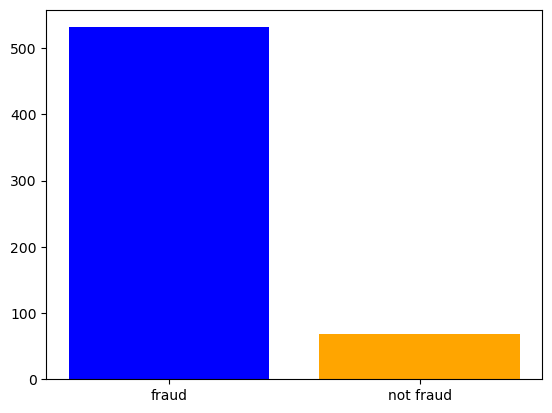

In [10]:
#Amount vs Fraudulence
#Bar graph that shows the difference in the average amount of money transacted during fradulent and non fradulent 
x=['fraud','not fraud']
y=[mean_fraudulent,mean_not_fraudulent]
plt.bar(x,y,color=['blue', 'orange'])
plt.show()

# Inference
Amount of money transacted during a fraudulent is much higher than a non fraudulent transaction

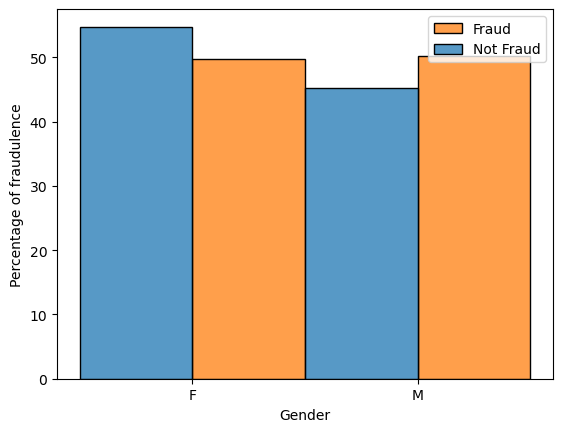

In [11]:
#Gender vs Fraudulence
#Bar graph that shows the relation between gender and fraudulent
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage of fraudulence')
ax.set_xlabel('Gender')
plt.legend( labels=['Fraud', 'Not Fraud'])


# Inference
Both male and Female credit card holders have almost similar percentage of fraudulent cases.Gender does not affect the fraudulence.

In [12]:
#Age vs Fraudulence
#calculation of age from DOB

def age_converter(x):
    l=x.split("-")
    y=int(l[0])
    return abs(y-2023)

df['age']=df['dob'].apply(lambda x:age_converter(x))

In [13]:
df.head()
    

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81.1781      3495   
1  43039 Riley Greens Suite 393          Orient  ... -118.2105       149   
2      594 White Dale Suite 530      Malad City  ... -112.2620      4154   
3   9443 Cynthia Court Apt. 038         Boulder  ... -112.1138      1939   
4              408 Bradley Rest        Doe Hill  ...  -79.4629        99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  age  
0         0   35  
1         0   45  
2         0   61  
3         0   56  
4         0   37  

[5 rows x 23 columns]

In [14]:
print("Max age:",df['age'].min())
print("Min age:",df['age'].max())

Max age: 18
Min age: 99


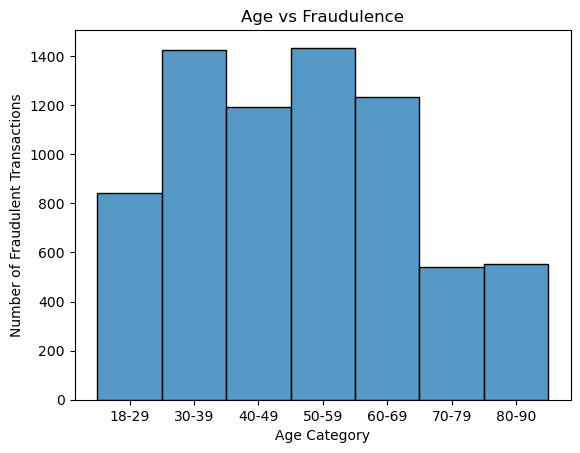

In [15]:
#set age categories accordingly
bins = [18, 30, 40, 50, 60, 70, 80, 90]  
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-90']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=age_labels, right=False)
br = sns.histplot(x='age_category', data=df[df['is_fraud'] == 1], bins=len(age_labels), discrete=True)
br.set_xlabel('Age Category')
br.set_ylabel('Number of Fraudulent Transactions')
plt.title('Age vs Fraudulence')
plt.show()

# Inference
Middle age groups(50-59) and (30-39) are more common to fraudulence

In [16]:
#Sate vs fraudulence
print(df['state'].unique())
df['state'].value_counts().head(10)


['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']


TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
Name: state, dtype: int64

In [17]:
#Satewise fraudulence :
statewise_fraudulence=df.groupby('state')['is_fraud'].sum().reset_index()
mean=statewise_fraudulence['is_fraud'].mean()
print("Average no of fraudulents in each state:",mean)
state_f=pd.DataFrame(statewise_fraudulence)
#Choosing only states with fraudulent cases more than average no of fraudulent cases
state_f=state_f[state_f['is_fraud']>mean]
print(state_f)

Average no of fraudulents in each state: 147.1764705882353
   state  is_fraud
1     AL       215
2     AR       161
4     CA       326
9     FL       281
14    IL       248
16    KS       156
17    KY       155
20    MD       157
22    MI       238
23    MN       207
24    MO       191
27    NC       149
29    NE       180
34    NY       555
35    OH       321
37    OR       149
38    PA       458
40    SC       193
43    TX       479
45    VA       198
48    WI       163


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'AL'),
  Text(1, 0, 'AR'),
  Text(2, 0, 'CA'),
  Text(3, 0, 'FL'),
  Text(4, 0, 'IL'),
  Text(5, 0, 'KS'),
  Text(6, 0, 'KY'),
  Text(7, 0, 'MD'),
  Text(8, 0, 'MI'),
  Text(9, 0, 'MN'),
  Text(10, 0, 'MO'),
  Text(11, 0, 'NC'),
  Text(12, 0, 'NE'),
  Text(13, 0, 'NY'),
  Text(14, 0, 'OH'),
  Text(15, 0, 'OR'),
  Text(16, 0, 'PA'),
  Text(17, 0, 'SC'),
  Text(18, 0, 'TX'),
  Text(19, 0, 'VA'),
  Text(20, 0, 'WI')])

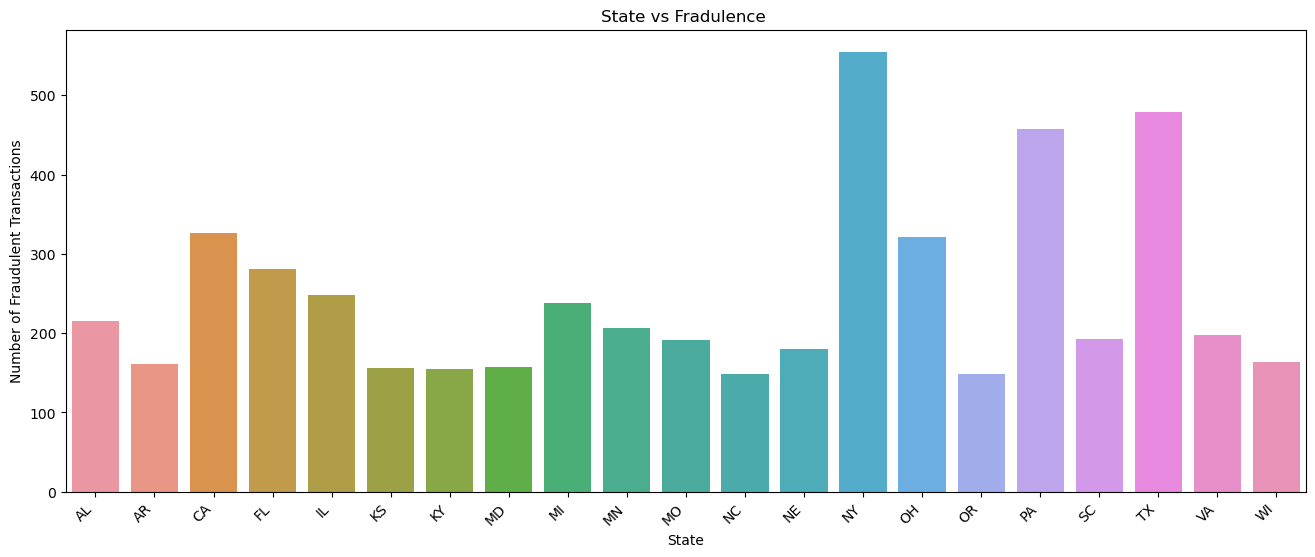

In [18]:
plt.figure(figsize=(16, 6))  
br = sns.barplot(x='state', y='is_fraud', data=state_f)
br.set_xlabel('State')
br.set_ylabel('Number of Fraudulent Transactions')
plt.title('State vs Fradulence ')
plt.xticks(rotation=45, ha='right') 

# Inference: New york has the highest no of fraudulents
followed by the states Texas and Pennsylvania


In [19]:
#Category vs fradulence

In [20]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [21]:
categorywise_fraudulence=df.groupby('category')['is_fraud'].sum().reset_index()
mean=categorywise_fraudulence['is_fraud'].mean()
print("Average no of fraudulents in each category:",mean)
category_f=pd.DataFrame(categorywise_fraudulence)
#Choosing only categories with fraudulent cases more than average no of fraudulent cases
category_f=category_f[category_f['is_fraud']>mean]
print(category_f)

Average no of fraudulents in each category: 536.1428571428571
         category  is_fraud
2   gas_transport       618
4     grocery_pos      1743
8        misc_net       915
11   shopping_net      1713
12   shopping_pos       843


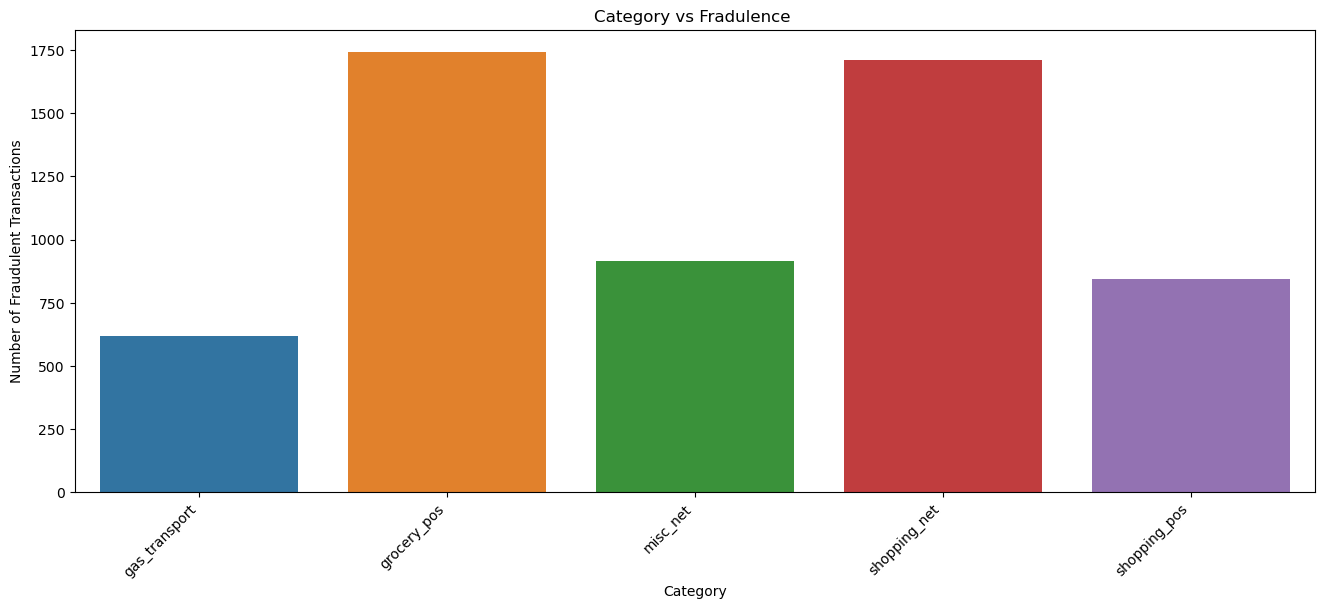

In [22]:
plt.figure(figsize=(16, 6))  
br = sns.barplot(x='category', y='is_fraud', data=category_f)
br.set_xlabel('Category')
br.set_ylabel('Number of Fraudulent Transactions')
plt.title('Category vs Fradulence ')
plt.xticks(rotation=45, ha='right',va='top') 
plt.show()

# Inference:
Grocery and Shopping net are the spending categories ,where fradulent cases are higher than average no of farudulent cases

In [23]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ... city_pop  \
0                561 Perry Cove  Moravian Falls  ...     3495   
1  43039 Riley Greens Suite 393          Orient  ...      149   
2      594 White Dale Suite 530      Malad City  ...     4154   
3   9443 Cynthia Court Apt. 038         Boulder  ...     1939   
4              408 Bradley Rest        Doe Hill  ...       99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

  is_fraud  age  age_category  
0        0   35         30-39  
1        0   45         40-49  
2        0   61         60-69  
3        0   56         50-59  
4        0   37         30-39  

[5 rows x 24 columns]

In [24]:
#Periodicity in fradulence

# Hourly Pattern:

In [25]:
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour

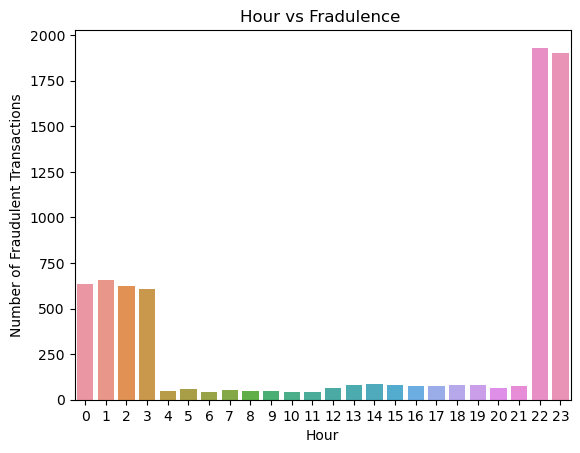

<Figure size 1800x900 with 0 Axes>

In [26]:
Hourly_frauds=df.groupby('hour')['is_fraud'].sum().reset_index()
Hourly_frauds=pd.DataFrame(Hourly_frauds)
br=sns.barplot(x=Hourly_frauds['hour'],y=Hourly_frauds['is_fraud'])
plt.figure(figsize=(18, 9))
br.set_xlabel('Hour')
br.set_ylabel('Number of Fraudulent Transactions')
br.set_title('Hour vs Fradulence ')
plt.show()

# Inference
Maximum fradulents occur between 11 to 12 am and around midnight(1 to 3am).

# Daywise patteren

In [27]:
#Day vs fradulence
df['Day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek

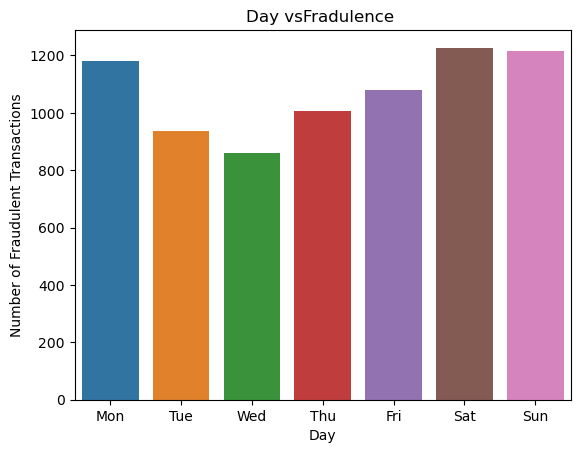

<Figure size 1800x900 with 0 Axes>

In [28]:
Daywise_frauds=df.groupby('Day')['is_fraud'].sum().reset_index()
Daywise_frauds=pd.DataFrame(Daywise_frauds)
br=sns.barplot(x=Daywise_frauds['Day'],y=Daywise_frauds['is_fraud'])
plt.figure(figsize=(18, 9))
br.set_xlabel('Day')
br.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
br.set_ylabel('Number of Fraudulent Transactions')
br.set_title('Day vsFradulence ')
plt.show()

# Inference:
Most fradulents occur during weekend(Sunday and Saturday) and Monday has more occurrence of fradulents too.

# Monthly Pattern

In [29]:
# Month vs fradulence
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month

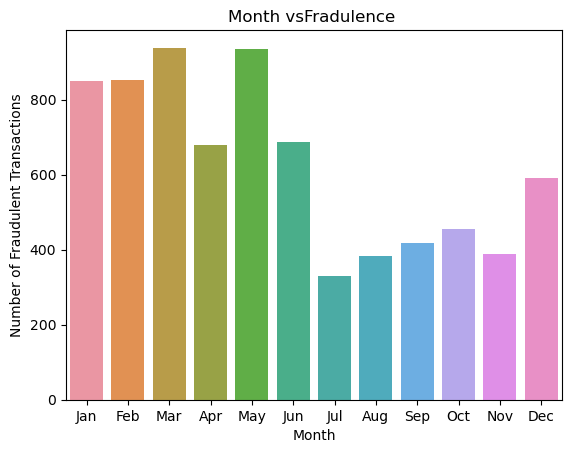

<Figure size 1800x1100 with 0 Axes>

In [30]:
Monthwise_frauds=df.groupby('month')['is_fraud'].sum().reset_index()
Monthwise_frauds=pd.DataFrame(Monthwise_frauds)
br=sns.barplot(x=Monthwise_frauds['month'],y=Monthwise_frauds['is_fraud'])
plt.figure(figsize=(18, 11))
br.set_xlabel('Month')
br.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
br.set_ylabel('Number of Fraudulent Transactions')
br.set_title('Month vsFradulence ')
plt.show()

# Inference
Months that have high occurence of fradulents: January to June and december

In [31]:
df.columns


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'age_category', 'hour', 'Day',
       'month'],
      dtype='object')

In [32]:
#Feature Selection
#selecting only the features that has effect on Fradulence
X_train=df[['category', 'amt','state','age','hour', 'Day','month']]
X_train=pd.DataFrame(X_train)
X_train

category     amt state  age  hour  Day  month
0             misc_net    4.97    NC   35     0    1      1
1          grocery_pos  107.23    WA   45     0    1      1
2        entertainment  220.11    ID   61     0    1      1
3        gas_transport   45.00    MT   56     0    1      1
4             misc_pos   41.96    VA   37     0    1      1
...                ...     ...   ...  ...   ...  ...    ...
1296670  entertainment   15.56    UT   62    12    6      6
1296671    food_dining   51.70    MD   44    12    6      6
1296672    food_dining  105.93    NM   56    12    6      6
1296673    food_dining   74.90    SD   43    12    6      6
1296674    food_dining    4.30    MT   28    12    6      6

[1296675 rows x 7 columns]

In [33]:
X_train_dummy=pd.get_dummies(X_train,drop_first=True)
Y_train=df['is_fraud'].values
X_train=X_train.values
X_train_dummy.shape
X_train_dummy=X_train_dummy.drop("state_DE",axis=1)
print(X_train_dummy.shape)


(1296675, 67)


In [34]:
#Testing data
test=pd.read_csv("fraudTest.csv")
test=pd.DataFrame(test)
test=test.drop('Unnamed: 0',axis=1)
test['age']=test['dob'].apply(lambda x:age_converter(x))
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['Day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month

In [35]:
X_test=test[['category', 'amt','state','age','hour', 'Day','month']]
X_test=pd.DataFrame(X_test)
X_test_dummy=pd.get_dummies(X_test,drop_first=True)

Y_test=test['is_fraud'].values
X_test=X_test.values

In [36]:
X_test_dummy.shape

(555719, 67)

In [37]:
print(X_train_dummy.shape)
print(X_test_dummy.shape)

(1296675, 67)
(555719, 67)


In [38]:
#Oversampling to remove imbalance in the data
from imblearn.over_sampling import SMOTE
smt= SMOTE()
X_balanced, y_balanced = smt.fit_resample(X_train_dummy,Y_train)
#X_test_balanced, y_test_balanced = smt.fit_resample(X_test_dummy,Y_test)



In [39]:
print(X_balanced.shape)
print(X_test_dummy.shape)

(2578338, 67)
(555719, 67)


In [47]:
#Model Building
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_balanced, y_balanced)
predictions=lr.predict(X_test_dummy)

warnings.simplefilter("ignore", category=ConvergenceWarning)


In [60]:
for i in predictions:
    if (i==1):
        print("Fradulent Transaction")
    else:
        print("Legitimate")

Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate
Legitimate

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [50]:
#Model evaluation
from sklearn.metrics import accuracy_score
print('Accuracy score is: ',accuracy_score(Y_test,predictions)*100)

Accuracy score is:  94.89724123162966


# Accuracy score of Logistic regression model:
The model performs with an accuracy score of 94.89 percent.